Based on the previous models' performance with binned features, additional features were engineered that grouped the arrivals and departures based on the time of day. The average monthly delays were also used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from project_functions import regression_metrics, scale_features

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics

In [2]:
time_flies = pd.read_csv("Final_Features.csv")

In [3]:
time_flies.head()

,Unnamed: 0,taxi_out,wheels_off,wheels_on,taxi_in,arr_delay,diverted,crs_elapsed_time,air_time,distance,...,Weather_Sunny,average_monthly_delay,time_of_departure_12am-6am,time_of_departure_6am-12pm,time_of_departure_12pm-6pm,time_of_departure_6pm-12am,time_of_arrival_12am-6am,time_of_arrival_6am-12pm,time_of_arrival_12pm-6pm,time_of_arrival_6pm-12am
0,0,12.0,1349.0,1452.0,9.0,66.0,0,146,123.0,733,...,0,6.965167,0,0,1,0,0,0,1,0
1,1,15.0,1956.0,2209.0,6.0,-29.0,0,359,313.0,2176,...,0,6.965167,0,0,0,1,0,0,0,1
2,2,32.0,1139.0,1844.0,12.0,1.0,0,285,245.0,2176,...,1,6.965167,0,1,0,0,0,0,0,1
3,3,11.0,1747.0,1911.0,4.0,-15.0,0,111,84.0,581,...,0,6.965167,0,0,1,0,0,0,0,1
4,4,12.0,938.0,1607.0,7.0,-35.0,0,259,209.0,1947,...,0,6.965167,0,1,0,0,0,0,1,0


In [4]:
time_flies.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
# time_flies.columns.tolist()

In [6]:
numeric = ['taxi_out',
         'wheels_off',
         'wheels_on',
         'taxi_in',
         'arr_delay',
         'crs_elapsed_time',
         'air_time',
         'distance',
         'average_monthly_delay']

categoric = list(set(time_flies.columns) - set(numeric))

#### Correlation Matrix

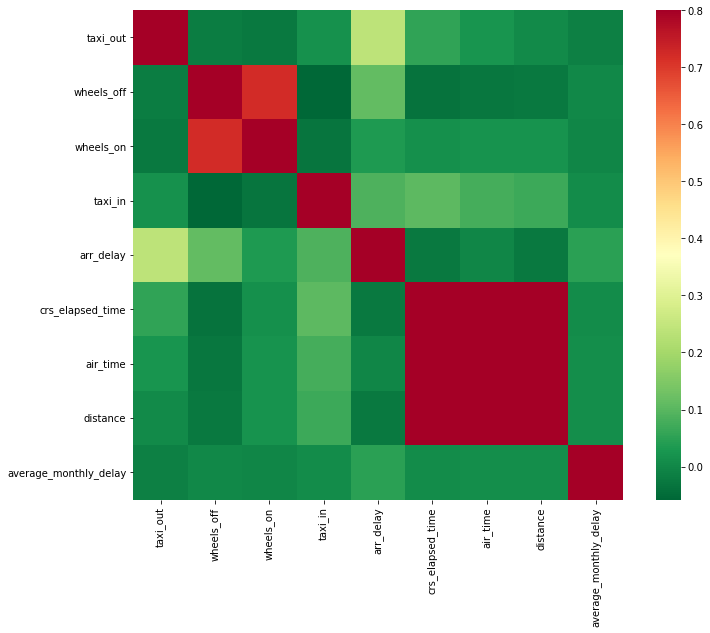

In [7]:
corrmat = time_flies[numeric].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

plt.show()

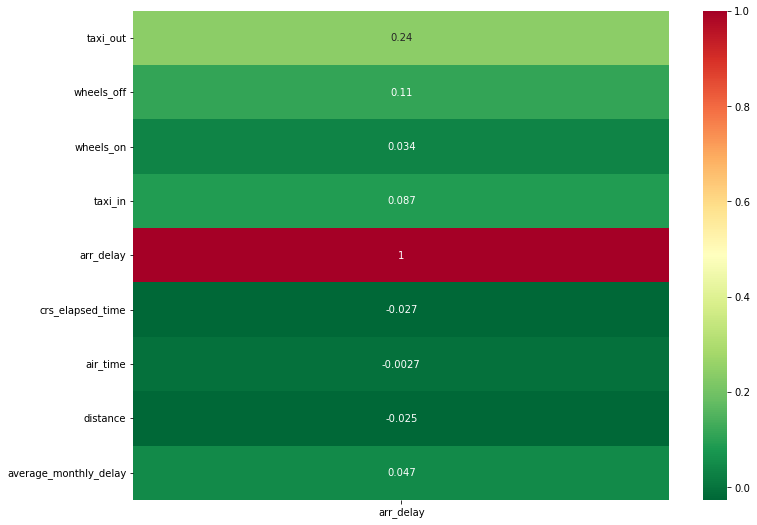

In [8]:
# numerical feature correlation with arrival delay
corrmat = time_flies[numeric].corr()

high_corr = corrmat.index[abs(corrmat['arr_delay'])>0.5]
plt.figure(figsize=(12,9))
sns.heatmap(corrmat[high_corr], annot=True, cmap='RdYlGn_r')

plt.show()

Average monthly delay has a weak relationship with arrival delay.

In [9]:
numeric.remove('arr_delay')

# Modeling

In [10]:
# assign target and predictors
y = time_flies['arr_delay']
X = time_flies.drop('arr_delay', axis=1)

In [11]:
seed = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [12]:
scaler = StandardScaler()

X_train_scaled, X_test_scaled = scale_features(X_train, X_test, numeric, categoric, scaler)

#### Linear Regression

In [13]:
line_reg = LinearRegression()

line_reg.fit(X_train_scaled, y_train)

yhat_line = line_reg.predict(X_test_scaled)

In [14]:
regression_metrics(y_test, yhat_line)

R^2: 0.14532445755603385
Mean Squared Error: 1714.892672475882
Mean Absolute Error: 19.599265759982387
Root MSE: 41.41126262837058


#### Random Forest

In [15]:
rfc = RandomForestRegressor(n_estimators=10, max_depth=8, random_state=seed)

rfc.fit(X_train_scaled, y_train)

yhat_rfc = rfc.predict(X_test_scaled)

In [16]:
regression_metrics(y_test, yhat_rfc)

R^2: 0.572436399335253
Mean Squared Error: 857.899459367588
Mean Absolute Error: 17.36216652593043
Root MSE: 29.28992078117638


#### Naive Bayes

In [17]:
gauss = GaussianNB()

gauss.fit(X_train_scaled, y_train) 

yhat_nb = gauss.predict(X_test_scaled)

In [18]:
regression_metrics(y_test, yhat_nb)

R^2: -90.97440001842229
Mean Squared Error: 184545.14820435355
Mean Absolute Error: 402.8366062664894
Root MSE: 429.5871834731031


Based on the metrics, our models did not improve. The value of R-squared went down and the mean errors increased. The average distance between the true and predicted values for arrival delay has increased.